# Part 1, exploratory data analysis (EDA)

Вопросы:

1. [2 балла] Загрузка данных и предобработка - загрузите датасет, указав параметр `nrows` равным 852 (в скачанном датасете есть какой-то мусор, по факту там всего 852 наблюдения). Посмотрите на его `head` и `tail`. Похоже, некоторые факторы у нас совершенно лишние. Например, нам никак не помогут 'RoundID' и 'MatchID', поэтому давайте их выкинем при помощи метода `.drop`. Воспользуйтесь функцией `describe()` для отображения базовых статистик переменных.
2. [1 балл] Какова средняя посещяемость матчей?
3. [1 балл] Давайте создадим нашу будущую целевую переменную - победа домашней команды. Так как победа - это если наши забили больше, создайте переменную `HomeTeamWin`, которая равна True, если 'Home Team Goals' больше, чем 'Away Team Goals' (это можно сделать  в одну строчку простым сравнением двух столбцов датасета друг с другом). 
4. [1 балл] Какие три команды чаще всего выступали в качестве Home Team? Это можно выяснить при помощи `.value_counts()`, примененной к нужному столбцу. 
5. [1 балл] Визуализация - Постройте гистограммы всех числовых переменных датасета при помощи одной команды. Для удобства отображения задайте размер графика `figsize` равным (25, 20).
6. [2 балла] Визуализация - При помощи `heatmap` постройте тепловую карту корреляций для всего датасета, подписав на графике все значения коэффициентов корреляции. Правда ли, что год положительно скоррелирован с посещаемостью матчей?
7. [2 балла] Группировка + Визуализация - при помощи `groupby` посчитайте средние значения посещаемости матча для каждого возможного значения Stage. Добавьте `.plot.bar()` для построения столбчатой диаграммы посещаемости. На каких матчах посещаемость максимальна на получившемся графике? Минимальна?

## Итого - 9 баллов, отлично :)

### Комментарий к решению
С загрузкой справились ;)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [38]:
data = pd.read_csv('C:/Users/Winsows/Downloads/Danielan_Artem_WorldCupMatches.csv')
data

,Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Winconditions,Attendance,Half-timeHomeGoals,Half-timeAwayGoals,Referee,Assistant 1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,9249.0,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX
6,1930,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,18306.0,0,0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201,1092,YUG,BOL
7,1930,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,,18306.0,2,0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201,1097,USA,PAR
8,1930,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,,57735.0,0,0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201,1099,URU,PER
9,1930,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,2000.0,0,0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201,1094,CHI,FRA


In [22]:
data = pd.read_csv('C:/Users/Winsows/Downloads/Danielan_Artem_WorldCupMatches.csv',nrows=852)
data

,Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Winconditions,Attendance,Half-timeHomeGoals,Half-timeAwayGoals,Referee,Assistant 1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,9249.0,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX
6,1930,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,18306.0,0,0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201,1092,YUG,BOL
7,1930,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,,18306.0,2,0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201,1097,USA,PAR
8,1930,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,,57735.0,0,0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201,1099,URU,PER
9,1930,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,2000.0,0,0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201,1094,CHI,FRA


In [4]:
data.head()

,Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Winconditions,Attendance,Half-timeHomeGoals,Half-timeAwayGoals,Referee,Assistant 1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA


In [5]:
data.tail()

,Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Winconditions,Attendance,Half-timeHomeGoals,Half-timeAwayGoals,Referee,Assistant 1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials
847,2014,05 Jul 2014 - 17:00,Quarter-finals,Arena Fonte Nova,Salvador,Netherlands,0,0,Costa Rica,Netherlands win on penalties (4 - 3),51179.0,0,0,Ravshan IRMATOV (UZB),RASULOV Abduxamidullo (UZB),KOCHKAROV Bakhadyr (KGZ),255953,300186488,NED,CRC
848,2014,08 Jul 2014 - 17:00,Semi-finals,Estadio Mineirao,Belo Horizonte,Brazil,1,7,Germany,,58141.0,0,5,RODRIGUEZ Marco (MEX),TORRENTERA Marvin (MEX),QUINTERO Marcos (MEX),255955,300186474,BRA,GER
849,2014,09 Jul 2014 - 17:00,Semi-finals,Arena de Sao Paulo,Sao Paulo,Netherlands,0,0,Argentina,Argentina win on penalties (2 - 4),63267.0,0,0,C�neyt �AKIR (TUR),DURAN Bahattin (TUR),ONGUN Tarik (TUR),255955,300186490,NED,ARG
850,2014,12 Jul 2014 - 17:00,Play-off for third place,Estadio Nacional,Brasilia,Brazil,0,3,Netherlands,,68034.0,0,2,HAIMOUDI Djamel (ALG),ACHIK Redouane (MAR),ETCHIALI Abdelhak (ALG),255957,300186502,BRA,NED
851,2014,13 Jul 2014 - 16:00,Final,Estadio do Maracana,Rio De Janeiro,Germany,1,0,Argentina,Germany win after extra time,74738.0,0,0,Nicola RIZZOLI (ITA),Renato FAVERANI (ITA),Andrea STEFANI (ITA),255959,300186501,GER,ARG


### Комментарий к решению
Чтобы дропнуть столбец, нужно обязательно убедиться, что преобразование изменило исходный датасет. По умолчанию, `.drop()` не изменяем исходный датасет, чтобы изменения записались нужно либо указать еще одно ключевое слово `inplace=True`, либо просто сделать следующую конструкцию:

In [ ]:
data = data.drop(['RoundID','MatchID'],axis=1)

In [6]:
data.drop(['RoundID','MatchID'],axis=1)

,Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Winconditions,Attendance,Half-timeHomeGoals,Half-timeAwayGoals,Referee,Assistant 1,Assistant2,HomeTeamInitials,AwayTeamInitials
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,4444.0,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),FRA,MEX
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,18346.0,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),USA,BEL
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,24059.0,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),YUG,BRA
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,2549.0,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),ROU,PER
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,23409.0,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),ARG,FRA
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,9249.0,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),CHI,MEX
6,1930,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,18306.0,0,0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),YUG,BOL
7,1930,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,,18306.0,2,0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),USA,PAR
8,1930,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,,57735.0,0,0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),URU,PER
9,1930,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,2000.0,0,0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),CHI,FRA


In [7]:
data.describe()

,Year,HomeTeamGoals,AwayTeamGoals,Attendance,Half-timeHomeGoals,Half-timeAwayGoals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


### Комментарий к решению
Тут всё тоже верно 

In [8]:
print('Средняя посещаемость',data.Attendance.mean())

Средняя посещаемость 45164.8


In [24]:
#if data.HomeTeamGoals.mean() > data.AwayTeamGoals.mean():
 #   HomeTeamWin = True
#else:
 #   HomeTeamWin = False
#print(HomeTeamWin)

In [10]:
data.HomeTeamName.value_counts().head(3)

Brazil       82
Italy        57
Argentina    54
Name: HomeTeamName, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


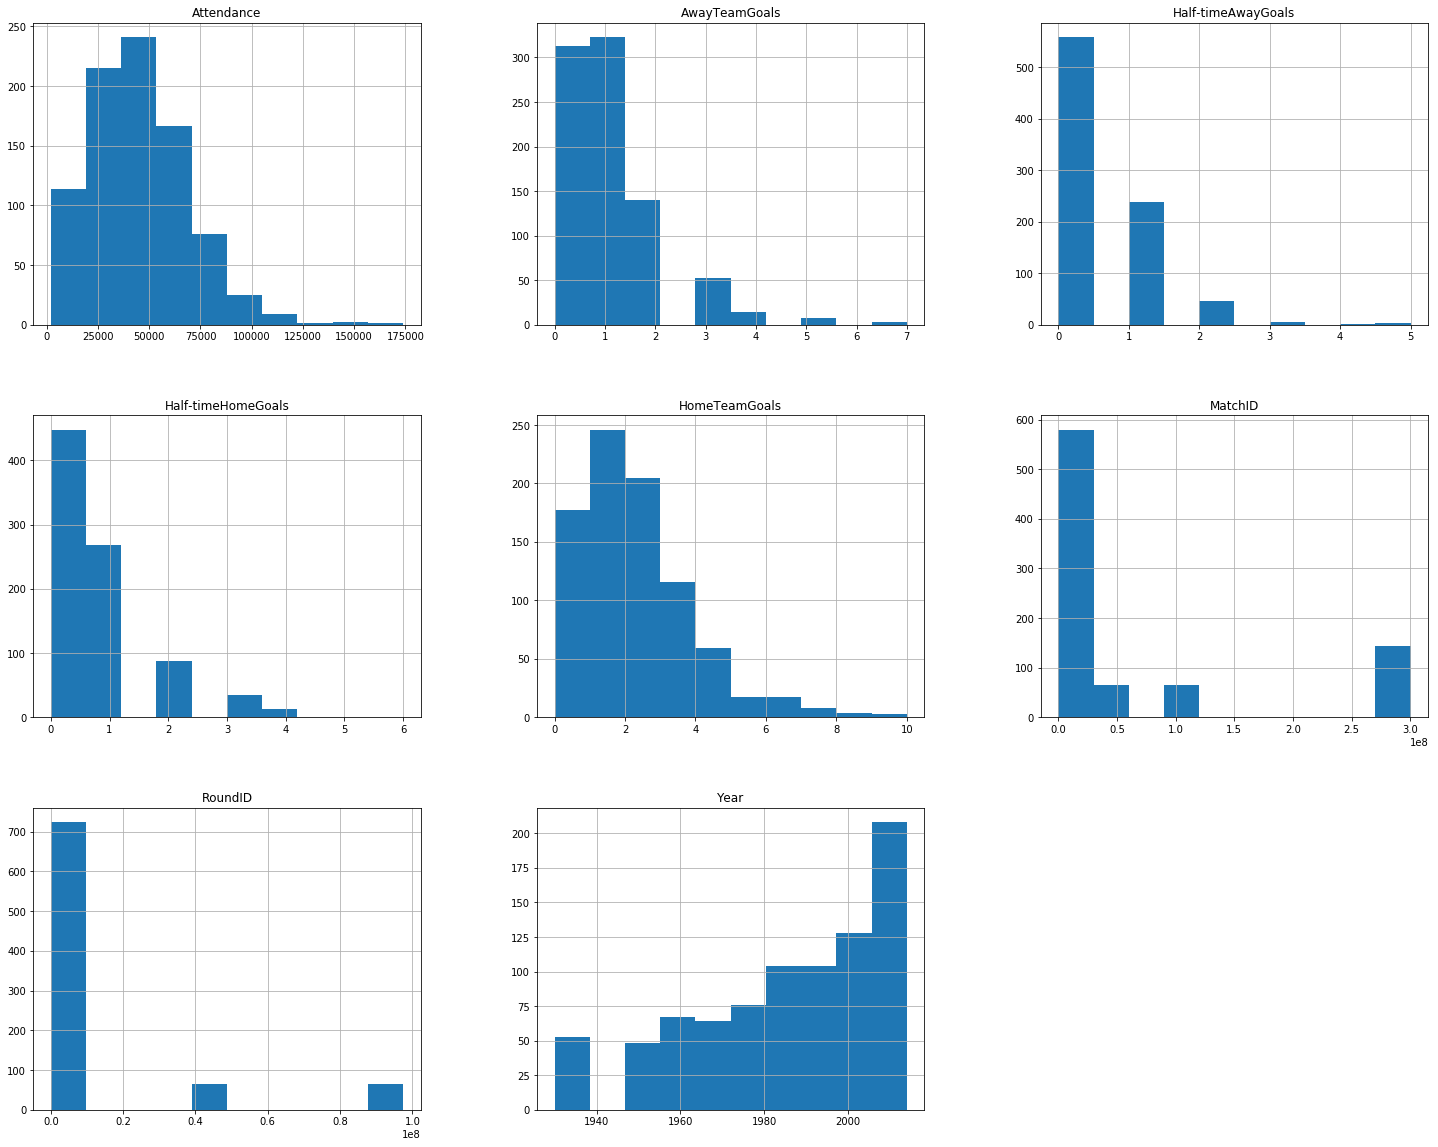

In [11]:
fig = plt.figure(figsize = (25,20)) 
ax = fig.gca() 
data.hist(ax = ax);

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Комментарий к решению
Так правда ли, что год положительно скоррелирован с посещаемостью? ;) А почему?

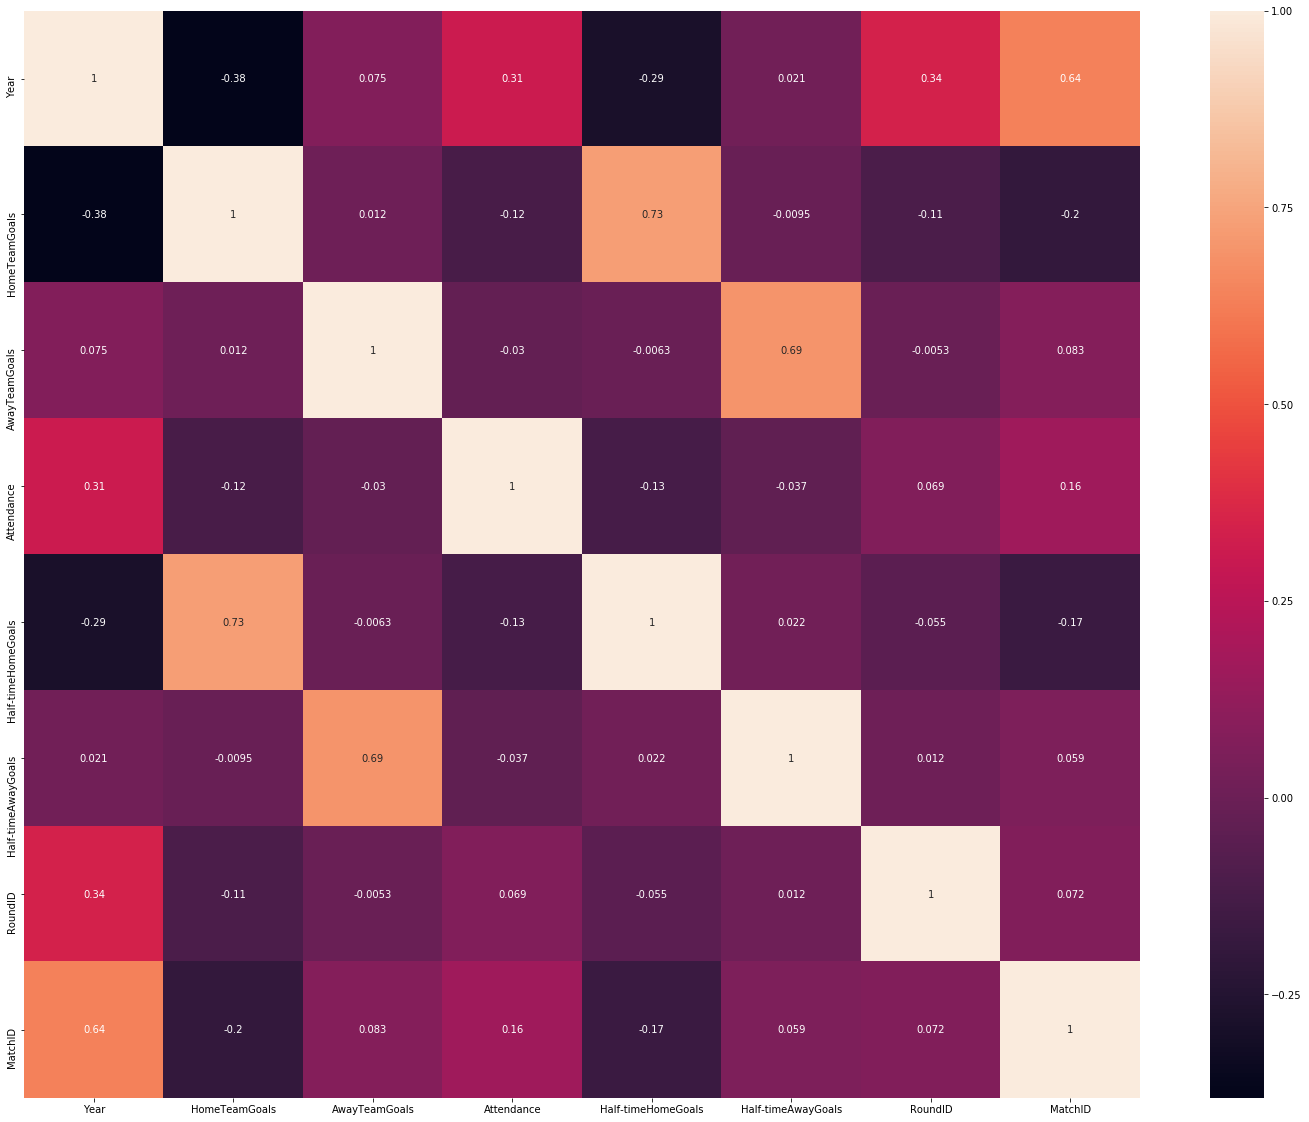

In [13]:
plt.figure(figsize=(25,20))
sns.heatmap(data.corr(), annot=True)

### Комментарий к решению
Отлично, всё верно :)

In [14]:
data.groupby('Stage').Attendance.mean()

Stage
Final                       76383.650000
First round                 16120.333333
Group 1                     41664.064516
Group 2                     34241.762712
Group 3                     34271.410714
Group 4                     25915.745455
Group 5                     35354.000000
Group 6                     65658.583333
Group A                     54321.350000
Group B                     51367.866667
Group C                     45514.937500
Group D                     45427.333333
Group E                     45675.916667
Group F                     42840.875000
Group G                     48533.166667
Group H                     46747.033333
Match for third place       50847.866667
Play-off for third place    68034.000000
Preliminary round           16875.000000
Quarter-finals              45697.484848
Round of 16                 52346.842857
Semi-finals                 59053.333333
Third place                 57741.500000
Name: Attendance, dtype: float64

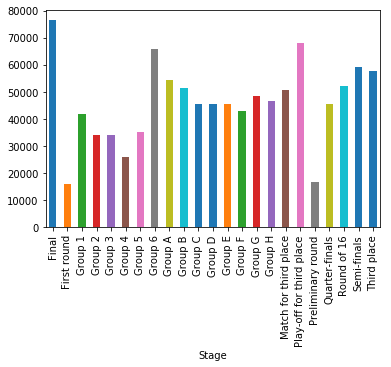

In [15]:
# Максимальное значение при Final Round; Минимальное при First Round
data.groupby('Stage').Attendance.mean().plot.bar()

In [34]:
for id in range (0, 852):
    print (data.HomeTeamGoals[id] > data.AwayTeamGoals[id])

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
True
False
True
True
True
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
False
True
True
True
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
False
False
True
False
True
True
False
False
True
True
True
False
True
True
False
True
False
True
False
True
False
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
True
False
True
True
False
True
True
True
True
True
False
True
True
True
False
True
True
True
True
True
True
True
True
True
False
True
True
True
False
True
True
True
True
True
True
False
True
False
True
True
False
True
True
True
True
True
True
True
True
True


In [45]:
HTW = [] 
for id in range (0, 852): 
    HTW.append(data.HomeTeamGoals[id] > data.AwayTeamGoals[id]) 
data['HomeTeamWin'] = HTW
data.to_csv('Danielan_Artem_WorldCupMatches.csv')
data

,Year,Datetime,Stage,Stadium,City,HomeTeamName,HomeTeamGoals,AwayTeamGoals,AwayTeamName,Winconditions,...,Half-timeHomeGoals,Half-timeAwayGoals,Referee,Assistant 1,Assistant2,RoundID,MatchID,HomeTeamInitials,AwayTeamInitials,HomeTeamWin
0,1930,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4,1,Mexico,,...,3,0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201,1096,FRA,MEX,True
1,1930,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3,0,Belgium,,...,2,0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201,1090,USA,BEL,True
2,1930,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2,1,Brazil,,...,2,0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201,1093,YUG,BRA,True
3,1930,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3,1,Peru,,...,1,0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201,1098,ROU,PER,True
4,1930,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1,0,France,,...,0,0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201,1085,ARG,FRA,True
5,1930,16 Jul 1930 - 14:45,Group 1,Parque Central,Montevideo,Chile,3,0,Mexico,,...,1,0,CRISTOPHE Henry (BEL),APHESTEGUY Martin (URU),LANGENUS Jean (BEL),201,1095,CHI,MEX,True
6,1930,17 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,4,0,Bolivia,,...,0,0,MATEUCCI Francisco (URU),LOMBARDI Domingo (URU),WARNKEN Alberto (CHI),201,1092,YUG,BOL,True
7,1930,17 Jul 1930 - 14:45,Group 4,Parque Central,Montevideo,USA,3,0,Paraguay,,...,2,0,MACIAS Jose (ARG),APHESTEGUY Martin (URU),TEJADA Anibal (URU),201,1097,USA,PAR,True
8,1930,18 Jul 1930 - 14:30,Group 3,Estadio Centenario,Montevideo,Uruguay,1,0,Peru,,...,0,0,LANGENUS Jean (BEL),BALWAY Thomas (FRA),CRISTOPHE Henry (BEL),201,1099,URU,PER,True
9,1930,19 Jul 1930 - 12:50,Group 1,Estadio Centenario,Montevideo,Chile,1,0,France,,...,0,0,TEJADA Anibal (URU),LOMBARDI Domingo (URU),REGO Gilberto (BRA),201,1094,CHI,FRA,True
